In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

Training accuracy:100%

Support vectors:
[[4.9 3. ]
 [5.7 3.8]
 [5.4 3.4]
 [5.  3. ]
 [5.4 3.4]
 [5.5 3.5]
 [4.5 2.3]
 [4.8 3. ]
 [4.9 2.4]
 [5.2 2.7]
 [5.6 3. ]
 [5.9 3.2]
 [5.4 3. ]
 [6.  3.4]
 [5.6 3. ]
 [5.1 2.5]]

Indicies of support vectors:
[ 1 18 20 25 31 36 41 45 57 59 66 70 84 85 88 98]

Number of support vectors for each class:[8 8]


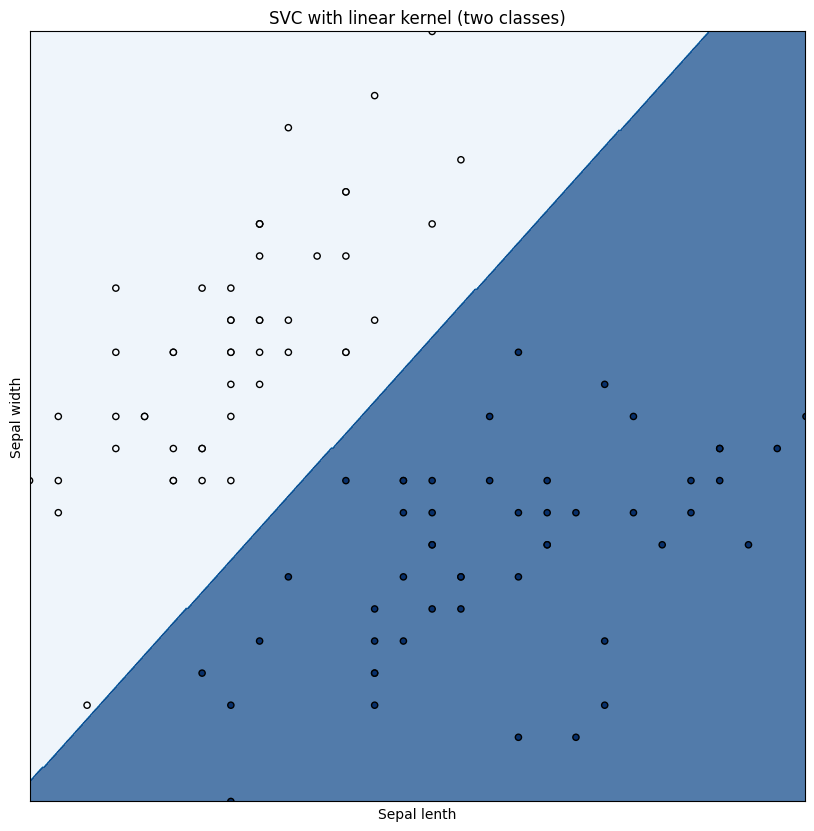

In [14]:
x,y=load_iris(return_X_y=True)
x=x[:,:2][y<=1]
y=y[y<=1]
c=1.0 #svm regularization parameter

clf=SVC(kernel='linear',C=c)
clf.fit(x,y)

x0,x1=x[:,0],x[:,1]
xx,yy=np.meshgrid( np.arange(x0.min(),x0.max(),0.005) , np.arange(x1.min(),x1.max(),0.005) )
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
cmap=plt.cm.Blues

fig,ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,z.reshape(xx.shape),cmap=cmap,alpha=.7)
ax.scatter(x0,x1,c=y,edgecolors='k',cmap=cmap,s=20)

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_title('SVC with linear kernel (two classes)')
ax.plot()
ax.set_xticks(())
ax.set_yticks([])

print('Training accuracy:{:.0f}%'.format(accuracy_score(y,clf.predict(x))*100))
print('\nSupport vectors:\n{}'.format(clf.support_vectors_))
print('\nIndicies of support vectors:\n{}'.format(clf.support_))
print('\nNumber of support vectors for each class:{}'.format(clf.n_support_))

In [15]:
clf.classes_

array([0, 1])

In [16]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
#scaling data

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',SVC(kernel='linear',C=c))
],verbose=True)
pipe.fit(x,y)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(kernel='linear'))],
         verbose=True)

Training accuracy:82%

Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


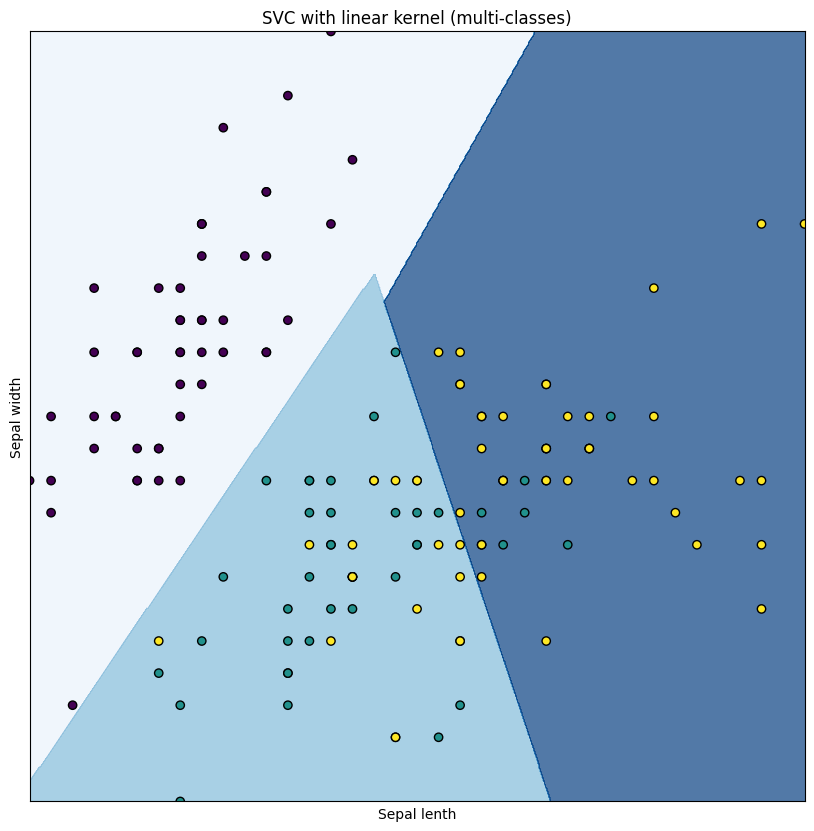

In [18]:
#multi-class classification

x,y=load_iris(return_X_y=True)
x=x[:,:2]
c=1.0 #svm regularization parameter

clf=SVC(kernel='linear',C=c)
clf.fit(x,y)

x0,x1=x[:,0],x[:,1]
xx,yy=np.meshgrid( np.arange(x0.min(),x0.max(),0.005) , np.arange(x1.min(),x1.max(),0.005) )
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
cmap=plt.cm.Blues

fig,ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,z.reshape(xx.shape),cmap=cmap,alpha=.7)
ax.scatter(x0,x1,c=y,edgecolors='k')

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_title('SVC with linear kernel (multi-classes)')
ax.plot()
ax.set_xticks(())
ax.set_yticks([])

print('Training accuracy:{:.0f}%'.format(accuracy_score(y,clf.predict(x))*100))
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y,clf.predict(x))))

# support vector machine classifier with kernels

Training accuracy:81%

Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 16 34]]


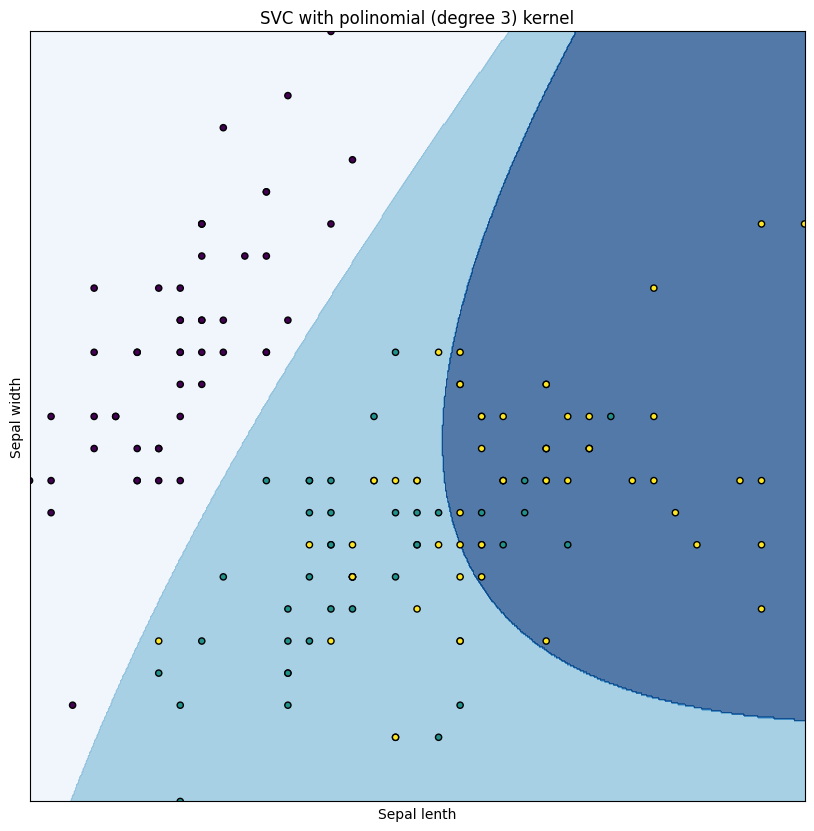

In [19]:
x,y=load_iris(return_X_y=True)
x=x[:,:2]
c=1.0 #svm regularization parameter

clf=SVC(kernel='poly',degree=3,gamma='auto', C=c)
clf.fit(x,y)

x0,x1=x[:,0],x[:,1]
xx,yy=np.meshgrid( np.arange(x0.min(),x0.max(),0.005) , np.arange(x1.min(),x1.max(),0.005) )
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
cmap=plt.cm.Blues

fig,ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,z.reshape(xx.shape),cmap=cmap,alpha=.7)
ax.scatter(x0,x1,c=y,edgecolors='k',s=20)

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_title('SVC with polinomial (degree 3) kernel')
ax.plot()
ax.set_xticks(())
ax.set_yticks([])

print('Training accuracy:{:.0f}%'.format(accuracy_score(y,clf.predict(x))*100))
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y,clf.predict(x))))

[LibSVM]*
optimization finished, #iter = 19
obj = -11.204383, rho = -0.048268
nSV = 20, nBSV = 15
*
optimization finished, #iter = 36
obj = -7.321614, rho = 0.145533
nSV = 15, nBSV = 9
*
optimization finished, #iter = 60
obj = -64.576674, rho = 0.137304
nSV = 70, nBSV = 63
Total nSV = 86

Training accuracy:83%

Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 13 37]]


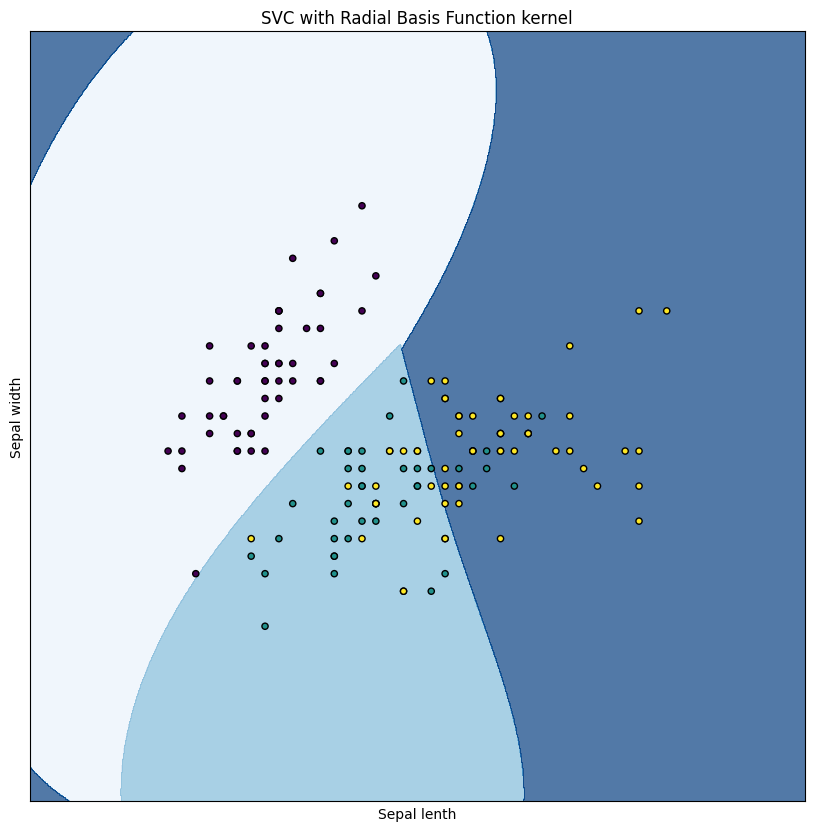

In [20]:
x,y=load_iris(return_X_y=True)
x=x[:,:2]
c=1.0 #svm regularization parameter

clf=SVC(kernel='rbf',gamma=.6, C=c,verbose=True)
clf.fit(x,y)

x0,x1=x[:,0],x[:,1]
xx,yy=np.meshgrid( np.arange(x0.min()-1,x0.max()+1,0.005) , np.arange(x1.min()-1,x1.max()+1,0.005) )
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
cmap=plt.cm.Blues

fig,ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,z.reshape(xx.shape),cmap=cmap,alpha=.7,)
ax.scatter(x0,x1,c=y,edgecolors='k',s=20,)

ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_title('SVC with Radial Basis Function kernel')
ax.plot()
ax.set_xticks(())
ax.set_yticks([])

print('\nTraining accuracy:{:.0f}%'.format(accuracy_score(y,clf.predict(x))*100))
print("\nConfusion Matrix:\n{}".format(confusion_matrix(y,clf.predict(x))))

In [21]:
clf.n_iter_

array([19, 36, 60], dtype=int32)

[LibSVM]*
optimization finished, #iter = 67
obj = -8.314900, rho = 0.347142
nSV = 22, nBSV = 18


Text(0.5, 1.0, 'SVR')

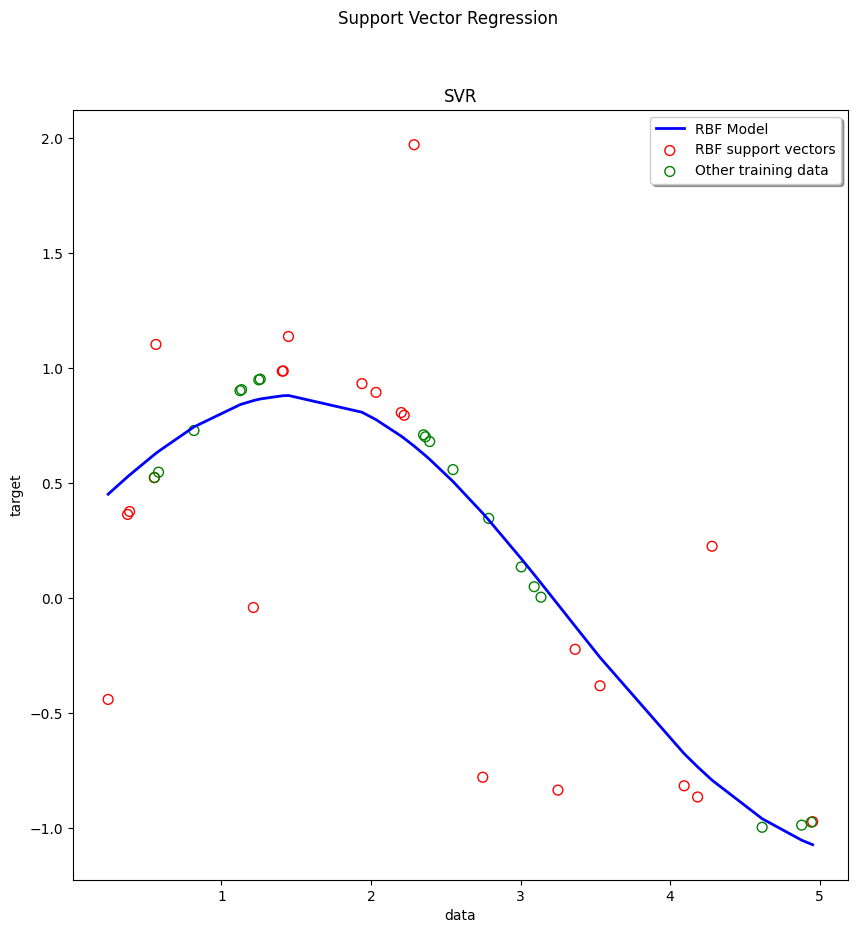

In [37]:
#support vector regression

from sklearn.svm import SVR

#genetate sample data
np.random.seed(45)
x=np.sort(5*np.random.rand(40,1),axis=0)
y=np.sin(x).ravel()


#add noise to targets
y[::5] += 3*(.5 - np.random.rand(8))

#fit regression model
svr=SVR(kernel='rbf',C=1,gamma=.1,epsilon=.1,verbose=True)
svr.fit(x,y)
y_pred=svr.predict(x)

#look at the result
lw=2

fig,ax=plt.subplots(figsize=(10,10))

ax.plot(x,y_pred,color='b',lw=lw,label='RBF Model')

ax.scatter(x[svr.support_],y[svr.support_],facecolors='none',edgecolors='r',s=50,label='RBF support vectors')

ax.scatter(x[np.setdiff1d(np.arange(len(x)),svr.support_)] , y[np.setdiff1d(np.arange(len(x)),svr.support_)],
          facecolors='None',edgecolors='g',s=50,label='Other training data')

ax.legend(shadow=True,fancybox=True,ncol=1)
ax.set_xlabel('data')
ax.set_ylabel('target')
fig.suptitle('Support Vector Regression')
ax.set_title('SVR')

#print('\nTrainng Score:{}'.format(accuracy_score(y,y_pred))) => ValueError: continuous is not supported

In [23]:
svr.support_vectors_

array([[0.24261   ],
       [0.37270393],
       [0.56230448],
       [1.21379078],
       [1.4484367 ],
       [2.28868996],
       [2.74772363],
       [2.78716351],
       [3.00502062],
       [3.25051211],
       [4.28091024],
       [4.6157477 ]])

In [24]:
svr.support_

array([ 0,  1,  5, 10, 15, 20, 25, 26, 27, 30, 35, 36], dtype=int32)

In [25]:
svr.n_support_

array([12], dtype=int32)

In [26]:
np.arange(len(x))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [27]:
svr.n_iter_

1225

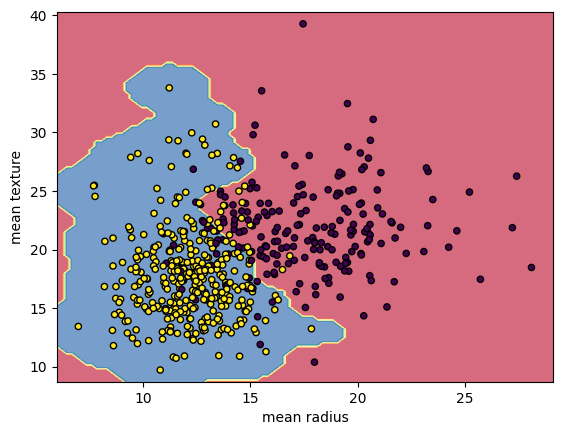

In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

breast_cancer=load_breast_cancer()
x=breast_cancer.data[:,:2]
y=breast_cancer.target

clf=SVC(kernel='rbf',C=1,gamma=.6)
clf.fit(x,y)

DecisionBoundaryDisplay.from_estimator(clf,x,response_method='predict',cmap=plt.cm.Spectral,alpha=.7,
                                      xlabel=breast_cancer.feature_names[0],ylabel=breast_cancer.feature_names[1])
plt.scatter(x[:,0],x[:,1],c=y,s=20,edgecolors='k')